### Import Libraries

In [1]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

### Create Data

In [179]:
def create_sequence(directory, number, sequence, col_num, num_set):
    '''Creates Sequence for Regression using Deep NN.
       Pass: Directory name, Cut Number, Sequence in Power of 2, Column to be exracted, Total Number Set.
       Return: 3-D Array to pass into the Neural Networks'''
    array = [] # Empty List
    for i in range(1, 316): # There are 315 files
        if i%10 == i:  # If i <= 9 i.e. i is a single digit number
            f = f'00{i}'
        elif i//10>=1 and i//10<=9: # If  i >=10 and i<=99 i.e. i is a double digit number.
            f = f'0{i}'
        else: # If  i >=100 and i<=999 i.e. i is a triple digit number.
            f = f'{i}'
        df = pd.read_csv(directory + f'c_{number}_{f}.csv', header=None) # Read CSV
        x = np.array(df[col_num]) # Extract the Column
        x = (x - np.mean(x))/np.std(x) # Z Normalize
        li = [] # Empty List to store 2-D nested List.
        l = []
        for k in range(2000):
            y = x[k*50: (k+1)*50]
            l.append(np.average(y))
        l = np.asarray(l)
        l = np.expand_dims(l, axis=0)
#         print(l.shape)
        # Create Sequence
#         for j in range(0, num_set):
#             if j==0:
#                 li.append(x[j*sequence:(j+1)*sequence]) # Append Sliced set to array
#             else:
#                 li.append(x[j*sequence-1:(j+1)*sequence-1]) # Append Sliced set to array
#         li = np.asarray(li) # Convert to 2-D Array
#         li = np.expand_dims(li, axis=1)
        array.append(l) # Append to Array for final 3-D
        
    array = np.asarray(array) # Convert to Array 3-D
#     print(array.shape)
    return array # Return

In [180]:
cut_1 = create_sequence(directory='C:/Users/MNTM/Desktop/Tool Wear/C1/', number='1', sequence=1024, col_num=0, num_set=40) # Call

In [181]:
cut_2 = create_sequence(directory='C:/Users/MNTM/Desktop/Tool Wear/C4/', number='4', sequence=1024, col_num=0, num_set=40) # Call

In [182]:
cut_3 = create_sequence(directory='C:/Users/MNTM/Desktop/Tool Wear/C6/', number='6', sequence=1024, col_num=0, num_set=40) # Call

In [183]:
print('Cut 1 shape:', cut_1.shape) # Print Shape
print('Cut 2 shape:', cut_2.shape) # Print Shape
print('Cut 3 shape:', cut_3.shape) # Print Shape

Cut 1 shape: (315, 1, 2000)
Cut 2 shape: (315, 1, 2000)
Cut 3 shape: (315, 1, 2000)


In [184]:
wear_c1 = pd.read_csv('C:/Users/MNTM/Desktop/Tool Wear/C1/c1_wear.csv') # Read CSV
wear_c1 = wear_c1.drop(labels=['cut'], axis = 1) # Drop the Cut Column
wear_c1['Max. Wear'] = wear_c1.max(axis = 1) # Find the Maximum of the three flutes wear in microns.
cut_1_wear = np.array(wear_c1['Max. Wear']) # Get the Maximum Wear as Array
wear_c1.head() # Read dataframes

,flute_1,flute_2,flute_3,Max. Wear
0,32.317114,48.892617,37.720825,48.892617
1,37.914879,49.570815,37.720825,49.570815
2,43.087910,50.302867,37.720825,50.302867
3,47.859072,51.083652,37.849851,51.083652
4,52.250329,51.908288,38.172665,52.250329


In [185]:
wear_c4 = pd.read_csv('C:/Users/MNTM/Desktop/Tool Wear/C4/c4_wear.csv') # Read CSV
wear_c4 = wear_c4.drop(labels=['cut'], axis = 1) # Drop the Cut Column
wear_c4['Max. Wear'] = wear_c4.max(axis = 1) # Find the Maximum of the three flutes wear in microns.
cut_4_wear = np.array(wear_c4['Max. Wear']) # Get the Maximum Wear as Array
wear_c4.head() # Read dataframes

,flute_1,flute_2,flute_3,Max. Wear
0,31.416355,19.483692,21.748063,31.416355
1,34.892770,23.473047,24.925960,34.892770
2,38.102847,27.172868,27.898659,38.102847
3,41.061023,30.599309,30.677848,41.061023
4,43.781191,33.767870,33.274721,43.781191


In [186]:
wear_c6 = pd.read_csv('C:/Users/MNTM/Desktop/Tool Wear/C6/c6_wear.csv') # Read CSV
wear_c6 = wear_c6.drop(labels=['cut'], axis = 1) # Drop the Cut Column
wear_c6['Max. Wear'] = wear_c6.max(axis = 1) # Find the Maximum of the three flutes wear in microns.
cut_6_wear = np.array(wear_c6['Max. Wear']) # Get the Maximum Wear as Array
wear_c6.head() # Read dataframes

,flute_1,flute_2,flute_3,Max. Wear
0,62.788648,9.896641,14.620908,62.788648
1,64.136043,19.793281,29.241817,64.136043
2,65.365273,29.689922,43.862725,65.365273
3,66.486880,39.586563,58.483634,66.486880
4,67.510808,43.019994,59.345759,67.510808


In [187]:
print('Wear 1 Shape:', cut_1_wear.shape) # Print Shapes
print('Wear 4 Shape:', cut_4_wear.shape) # Print Shapes
print('Wear 6 Shape:', cut_6_wear.shape) # Print Shapes

Wear 1 Shape: (315,)
Wear 4 Shape: (315,)
Wear 6 Shape: (315,)


In [188]:
trainX_1 = np.concatenate((cut_1, cut_2), axis=0) # Concatenate Train Features
testX_1 = cut_3 # Test Set Features
trainY_1 = np.concatenate((cut_1_wear, cut_4_wear), axis=0) # COncatenate Train Labels
testY_1 = cut_6_wear # Test Set Labels

In [189]:
trainX_2 = np.concatenate((cut_1, cut_3), axis=0) # Concatenate Train Features
testX_2 = cut_2 # Test Set Features
trainY_2 = np.concatenate((cut_1_wear, cut_6_wear), axis=0) # COncatenate Train Labels
testY_2 = cut_4_wear # Test Set Labels

In [190]:
trainX_3 = np.concatenate((cut_2, cut_3), axis=0) # Concatenate Train Features
testX_3 = cut_1 # Test Set Features 
trainY_3 = np.concatenate((cut_4_wear, cut_6_wear), axis=0) # COncatenate Train Labels
testY_3 = cut_1_wear # Test Set Labels

In [191]:
print('TrainX Shape:', trainX_1.shape)
print('TestX Shape:', testX_1.shape)
print('TrainY Shape:', trainY_1.shape)
print('TestY Shape:', testY_1.shape)

TrainX Shape: (630, 1, 2000)
TestX Shape: (315, 1, 2000)
TrainY Shape: (630,)
TestY Shape: (315,)


### Model

In [192]:
model = tf.keras.Sequential(name='LSTM_TOOL_WEAR_PREDICTOR') # Sequential Model
model.add(tf.keras.layers.InputLayer(input_shape=(trainX_1.shape[1], trainX_1.shape[2]), name='input_layer')) # Input Layer
model.add(tf.keras.layers.LSTM(256, return_sequences=True, name='LSTM_1')) # LSTM Layer
model.add(tf.keras.layers.Dropout(0.1, name='DROPOUT_1')) # Dropout Layer
model.add(tf.keras.layers.LSTM(256, return_sequences=True, name='LSTM_2')) # LSTM Layer
model.add(tf.keras.layers.Dropout(0.2, name='DROPOUT_2')) # Dropout Layer
model.add(tf.keras.layers.LSTM(256, return_sequences=True, name='LSTM_3')) # LSTM Layer
model.add(tf.keras.layers.Dropout(0.2, name='DROPOUT_3')) # Dropout Later
model.add(tf.keras.layers.Flatten(name='Flatten')) # Flatten Layer
model.add(tf.keras.layers.Dense(units=32, activation='relu', name='Dense_1')) # Dense Layer
model.add(tf.keras.layers.Dropout(0.2, name='Dropout_4')) # Dropout Layer
model.add(tf.keras.layers.Dense(units=8, activation='relu', name='Dense_2')) # Dense Layerr
model.add(tf.keras.layers.Dense(units=1, name='Predictor')) # Dense Layer

In [193]:
model.summary()

Model: "LSTM_TOOL_WEAR_PREDICTOR"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
LSTM_1 (LSTM)                (None, 1, 256)            2311168   
_________________________________________________________________
DROPOUT_1 (Dropout)          (None, 1, 256)            0         
_________________________________________________________________
LSTM_2 (LSTM)                (None, 1, 256)            525312    
_________________________________________________________________
DROPOUT_2 (Dropout)          (None, 1, 256)            0         
_________________________________________________________________
LSTM_3 (LSTM)                (None, 1, 256)            525312    
_________________________________________________________________
DROPOUT_3 (Dropout)          (None, 1, 256)            0         
_________________________________________________________________
Flatten (Flatten)            (None, 256)  

In [194]:
class RMSE(tf.keras.losses.Loss):
    def __init__(self):
        super().__init__()
    def call(self, y_true, y_pred):
        rmse = tf.sqrt(tf.reduce_mean(tf.math.squared_difference(y_pred, y_true)))
        return rmse

In [195]:
model.compile(optimizer=tf.keras.optimizers.Adam(), loss=RMSE())

In [196]:
history = model.fit(trainX_1, trainY_1, epochs=75, verbose=1)

Epoch 1/75
20/20 [==============================] - 5s 27ms/step - loss: 112.8149
Epoch 2/75
20/20 [==============================] - 1s 27ms/step - loss: 88.1858
Epoch 3/75
20/20 [==============================] - 1s 28ms/step - loss: 54.6149
Epoch 4/75
20/20 [==============================] - 1s 27ms/step - loss: 39.5575
Epoch 5/75
20/20 [==============================] - 1s 26ms/step - loss: 37.9238
Epoch 6/75
20/20 [==============================] - 1s 27ms/step - loss: 36.1042
Epoch 7/75
20/20 [==============================] - 1s 27ms/step - loss: 36.6694
Epoch 8/75
20/20 [==============================] - 1s 27ms/step - loss: 36.7215
Epoch 9/75
20/20 [==============================] - 1s 28ms/step - loss: 31.6302
Epoch 10/75
20/20 [==============================] - 1s 28ms/step - loss: 25.4898
Epoch 11/75
20/20 [==============================] - 1s 27ms/step - loss: 25.8780
Epoch 12/75
20/20 [==============================] - 1s 27ms/step - loss: 25.1297
Epoch 13/75
20/20 [=====

In [197]:
model.evaluate(testX_1, testX_1, verbose=1)

10/10 [==============================] - 1s 12ms/step - loss: 114.6840


114.68402862548828

In [200]:
y = model.predict(testX_1, verbose=1)

10/10 [==============================] - 0s 8ms/step


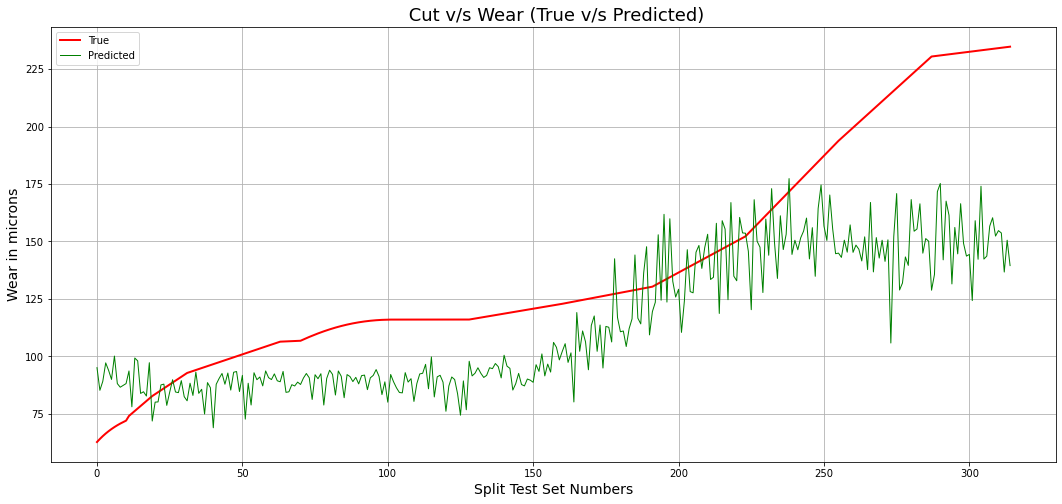

In [201]:
# Plot True RUL v/s Predicted RUL
def plot_prediction():
    plt.figure(figsize = (18, 8))
    plt.plot(testY_1, 'red', label = 'True', linewidth=2)
    plt.plot(y, 'green', label = 'Predicted', linestyle='-', linewidth=1)
    plt.xlabel('Split Test Set Numbers', fontdict={'fontsize':14})
    plt.ylabel('Wear in microns', fontdict={'fontsize':14})
    plt.title(' Cut v/s Wear (True v/s Predicted)', fontdict={'fontsize':18})
    plt.legend()
    plt.grid(True)
    plt.show()
    return None

# Call
plot_prediction()

In [ ]:
%reset